In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Build a Synth in Five Lines (of your own code)
## About
* Remy Porter
* "Creative Coder" @ Iontank
* Amateur Violinist
* Incredibly Lazy
* @remyporter
* Github: RemyPorter

# A Lesson in False Advertising
* I didn't actually count the lines
* There will be more than five
* You don't actually NEED five
* Counting lines of code is silly

In [72]:
## Five Line Synthesis
import numpy as np
import sounddevice as sd
time = np.linspace(0, 1, 44100)
signal = np.sin(time * 2 * np.pi * 440)
sd.play(signal)

# What We're Going to Do
* Talk Music
* Talk Time
* Use trivial amounts of Python code
* Talk Math with `numpy`
* Make some bleeps and bloops
* Use intuition to fumble our way to interesting results
* Spend some time in our "don't know" space

## And We're Going to Build it Simply
* Two libraries: `numpy` and `sounddevice` (for playback)
* Almost entirely 1-line functions
* Code so simple a unit-test would be pointless

# Music
## What is Music?
<img src="images/sheetmusic.jpg">

## Terms
* Notes
* Beats
* Rhthyms
* Tones

## Other Tools
<a title="Nina Richards (who can be contacted via ZoeB). [CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Doepfer_A-100.jpg"><img width="512" alt="Doepfer A-100" src="images/modularsynth.jpg"></a>
* Music as a construct
* Wiring describes patterns

## Bebe and Louis Barron
<img src="images/louisandbebe.jpg" style="float: right" title="Louis and Bebe Barron in their Greenwich Village Studio, Jan 1st 1956 Walter Daran.">

* [Composers, most notable for Forbidden Planet soundtrack](https://www.npr.org/templates/story/story.php?storyId=4486840)
* Directly built circuits *using an intuition* about how they should work
* Often [ran the circuits to destruction](http://www.effectrode.com/knowledge-base/the-self-destructing-modules-behind-revolutionary-1956-soundtrack-of-forbidden-planet/) to generate surprising effects
* Collaged pieces together by tape-recording circuits

# What is Music?



# **A Time Varying Signal**
<img src="images/waveforms.png">
<small>By <a href="//commons.wikimedia.org/wiki/User:Omegatron" title="User:Omegatron">Omegatron</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=343520">Link</a></small>

# Time
* Is continuous
* Computers aren't good at continuous
* Wait, haven't I heard the word "sampling" before?

In [5]:
# sample time
np.linspace(0, 1, 44100) #count from 0-1 in 44,100 steps

array([0.00000000e+00, 2.26762512e-05, 4.53525023e-05, ...,
       9.99954647e-01, 9.99977324e-01, 1.00000000e+00])

In [6]:
SAMPLE_RATE=44100
def space(duration, sample_rate=SAMPLE_RATE):
  """Generate a temporal space of `duration` seconds at `sample_rate` sampling frequency"""
  return np.linspace(0, duration, duration*sample_rate)

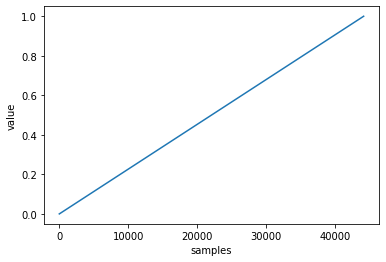

In [7]:
one_second = space(1)

plt.axes(xlabel="samples", ylabel="value")
plt.plot(one_second)

## What's a Note?
* Some sort of wave, right?
* I know what a sin wave is, and NumPy has a sin function

### A Concert A
* 440hz
* Which is 440 cycles a second
* A cycle is a sweep from 0 radians to 2PI radians

<img src="images/sin.gif">

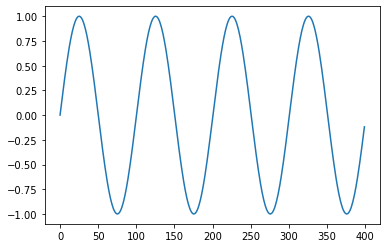

In [8]:
sin440 = np.sin(one_second*2*np.pi*440)
plt.plot(sin440[0:400])

In [73]:
sd.play(sin440)

In [10]:
# that seems useful, let's make a convenience function
def sin(space, freq, shift=0):
  """Convert an input space to a sinusoidal wave with `freq` frequency. `shift` moves the phase."""
  return np.sin(2*np.pi*space*freq+shift)

## NumPy and Broadcasting
* Numpy's core feature is that it efficiently operates on ENTIRE arrays
* "vectorized" functions

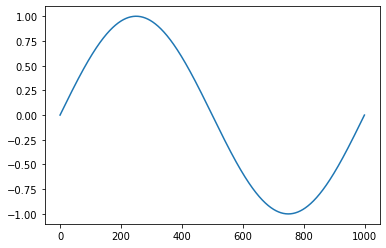

In [75]:
plt.plot(np.sin(np.linspace(0, 2*np.pi, 1000)))

# THIS IS THE BIG IDEA
* NumPy arrays can be passed to functions
* NumPy arrays support arithmetic operations

In [12]:
a = np.array([0.25, 0.5, 0.75])
b = np.array([0.75, 0.5, 0.25])
print(a * 2 * np.pi)
print(a + b)

[1.57079633 3.14159265 4.71238898]
[1. 1. 1.]


## Wait… we can add arrays together?

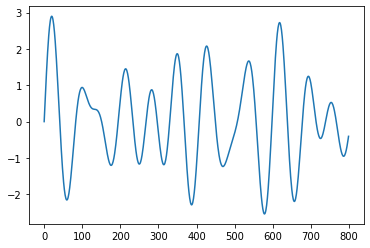

In [13]:
a = sin(one_second, 440)
c = sin(one_second, 523.35)
e = sin(one_second, 659.25)
chord = a + c + e
plt.plot(chord[0:800])

In [76]:
sd.play(chord)

Why was that ugly? *Clipping*: our audio needs to be in the range [-1, 1]

In [77]:
sd.play(chord/3) #broadcasting!

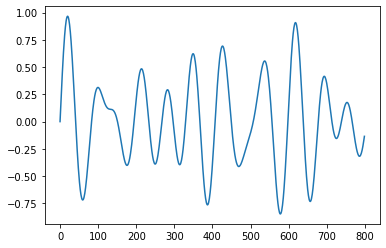

In [16]:
plt.plot(chord[0:800]/3)

## Wait, so we just added, sined, divided…
that gives me an idea…

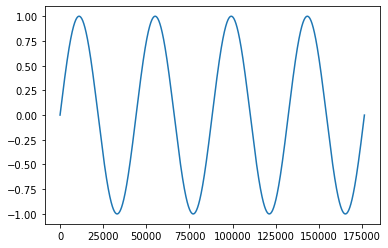

In [17]:
four_seconds = space(4)
a = sin(four_seconds, 440)
hz1 = sin(four_seconds, 1)
plt.plot(hz1)

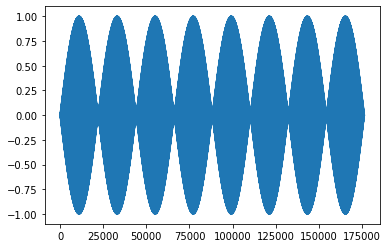

In [18]:
plt.plot(a*hz1)

In [78]:
sd.play(a*hz1)

In [79]:
c = sin(four_seconds, 523.35)
e = sin(four_seconds, 659.25)
beated = (a * sin(four_seconds, 0.66666) +
  c * sin(four_seconds, 0.7) +
  e * sin(four_seconds, 2.5)) / 3.
sd.play(beated)

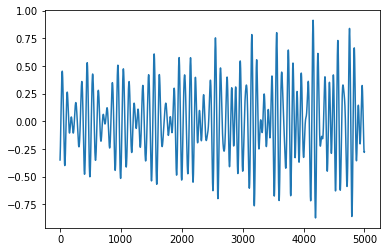

In [21]:
plt.plot(beated[8000:13000])

# Sin of the Times?
* Sin is useful, but what other waveforms might we want?
* Sawtooth? Triangle? Square?

## Square should be easy
* It's either positive, or negative, or maybe crossing zero

In [22]:
np.sign([-0.5, 0.5])

array([-1.,  1.])

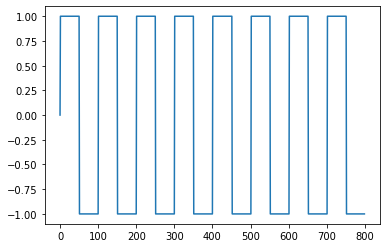

In [23]:
plt.plot(np.sign(a)[0:800])

In [80]:
sd.play(np.sign(a)*0.25) # this "feels" louder, so I'm shrinking the wave

In [25]:
def square(space, freq, shift=0):
  """Generate a square wave by gating a sin"""
  return np.sign(sin(space, freq, shift))

In [81]:
sqA = square(four_seconds, 440) * 0.25
sd.play(hz1 * sqA)

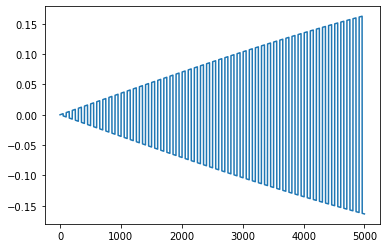

In [27]:
plt.plot((hz1 * sqA)[0:5000])

## Making Beats?
* Squares make natural beats
* Because we multiply waves together, we need to constrain wave to [0, 1]
* Anything times zero is zero (no sound)

In [28]:
np.heaviside([-1, -0.5, 0, 0.5, 1], 0) # everything <= 0 is 0, everything greater than 0 is 1

array([0., 0., 0., 1., 1.])

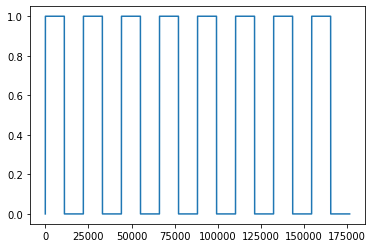

In [29]:
bpm120 = np.heaviside(square(four_seconds, 2), 0)
plt.plot(bpm120)

In [82]:
sd.play(bpm120 * (a + c + e) / 3)

# Broadcasting the Broadcasted

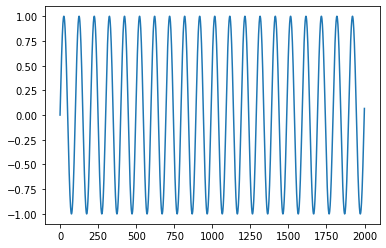

In [31]:
lfo = sin(one_second, 10) * 5
wat = sin(one_second, lfo+440)
plt.plot(wat[0:2000])

In [83]:
sd.play(wat)

## We can make our frequency an array?!
```
def sin(space, freq, shift=0):
  """Convert an input space to a sinusoidal wave with `freq` frequency. `shift` moves the phase."""
  return np.sin(2*np.pi*space*freq+shift)
```
* **space*freq**
* We can multiply and add arrays together, and that's all we're doing here!


## Wait, that gives me another idea…

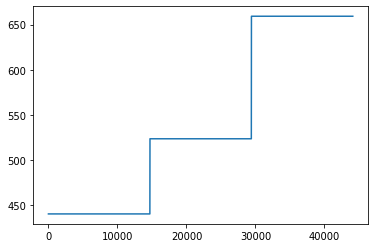

In [33]:
buffer = np.zeros((SAMPLE_RATE)) # one second of zeros
buffer[::] = 440 #fill the whole array
buffer[int(SAMPLE_RATE/3):] = 523.35 #last two thirds
buffer[int(2*SAMPLE_RATE/3):] = 659.25 # last third
plt.plot(buffer)

In [84]:
sd.play(square(one_second, buffer)*0.25)

In [85]:
sd.play(
    square(one_second, buffer)*0.25*sin(one_second, 3)
)

# Other Synth Functions
* Other waveforms?
* Normalization?
* Actual composition?

## Waveforms

In [36]:
def saw(space, freq, shift=0):
  """Sawtooth wave"""
  return np.arctan(
    1. / np.tan(
      space * np.pi * freq + shift
    )
  )

/Users/rdp/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


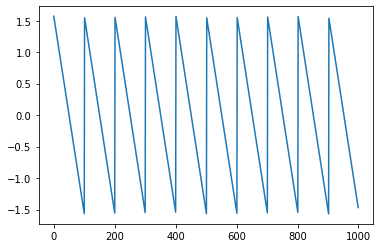

In [37]:
plt.plot(saw(one_second, 440)[0:1000])

In [86]:
sd.play(saw(one_second, 440)*0.25)

/Users/rdp/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [39]:
def pulse(space, freq, duty_cycle=0.5, shift=0, normalize=True):
  """
  Generate a rectangular wave with a given duty cycle 

  This wave may either be in the range [0,1] (if normalize==False)
  or may be in the range [-1,1] (if normalize==True, the default)
  """
  s = square(space, freq, shift)
  t = square(space, freq, shift+duty_cycle*2*np.pi)
  wav = np.heaviside(s-t,0)
  if normalize:
    return wav * 2. - 1
  return wav

In [40]:
dc25 = pulse(one_second, 440, 0.25)
dc12 = pulse(one_second, 440, 0.12)
dc50 = pulse(one_second, 440, 0.5)

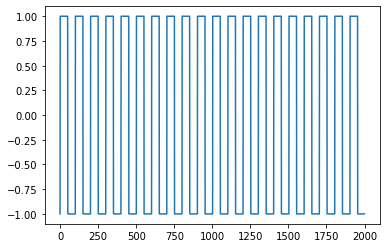

In [41]:
plt.plot(dc50[0:2000])

In [87]:
sd.play(dc50*0.25)

In [88]:
sd.play(dc25*0.25)

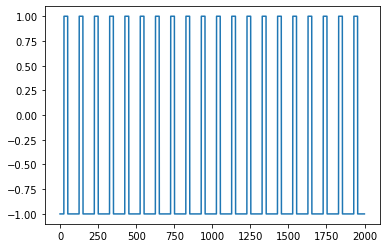

In [42]:
plt.plot(dc25[0:2000])

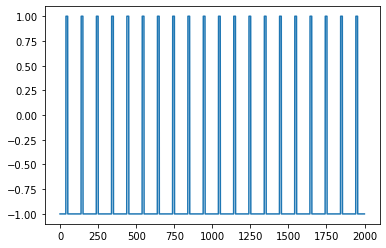

In [43]:
plt.plot(dc12[0:2000])

In [89]:
sd.play(dc12*0.25)

## Normalization
* We need to scale our signal to the range [-1, 1]
* We can do that with simple multiplication, division, and basic math
* Not including the functions here in the interests of time

## Stepping Smooth

In [47]:
def smoothstep(edge0, edge1, x):
  """
  Hermite Interpolation, lifted from OpenGL shaders.

  Converts a data stream into a sigmoid from edge0 to edge1 (outputting in the range [0.,1.])
  """
  t = np.clip((x - edge0) / (edge1 - edge0), 0.0, 1.0)
  return t * t * (3.0 - 2.0 * t)

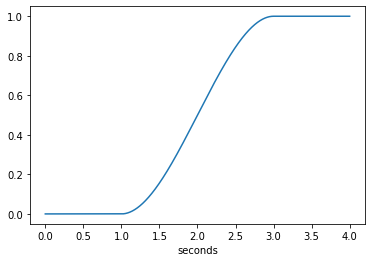

In [48]:
plt.axes(xlabel="seconds")
plt.plot(four_seconds, smoothstep(1, 3, four_seconds))

In [91]:
gate = smoothstep(1, 1.5, four_seconds)
sd.play(a * gate)

In [93]:
a_gate = smoothstep(0, 1, four_seconds)
c_gate = smoothstep(1, 2, four_seconds)
e_gate = smoothstep(2, 3, four_seconds)
sequence = (a * a_gate + c * c_gate + e * e_gate)
sd.play(sequence)

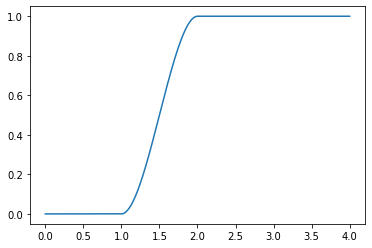

In [51]:
plt.plot(four_seconds, c_gate)

In [94]:
a_gate = smoothstep(0, 0.25, four_seconds) - smoothstep(1, 2, four_seconds) + smoothstep(2.5, 3, four_seconds) - smoothstep(3, 4, four_seconds)
c_gate = smoothstep(0.35, 0.5, four_seconds) - smoothstep(1, 3, four_seconds)
e_gate = smoothstep(2, 3, four_seconds) - smoothstep(3, 4, four_seconds)
sequence = (a * a_gate + c * c_gate + e * e_gate)
sd.play(sequence)

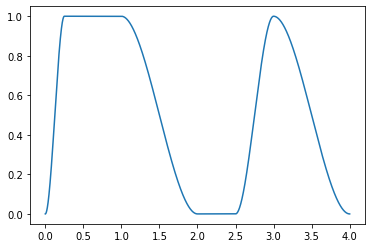

In [53]:
plt.plot(four_seconds, a_gate)

# Smoothstep seems useful…

In [54]:
def sigmoid(space, freq, shift=0):
  """Convert an input space to a sigmoidal wave with `freq` frequency. `shift` moves the phase."""
  return smoothstep(0, 1., sin(space, freq, shift)) + smoothstep(-1., 0., sin(space, freq, shift))

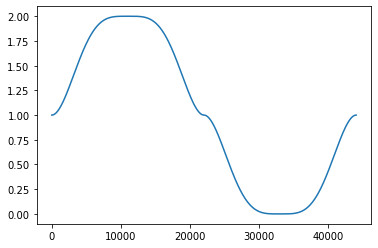

In [55]:
plt.plot(sigmoid(one_second, 1))

# A Short Song

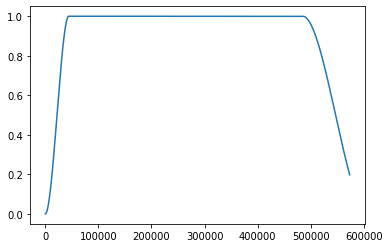

In [69]:
import shaded as sh
from sounddevice import play
song = sh.space(13)
overall_env = sh.smoothstep(0,1,song) - sh.smoothstep(11,13.8,song)
plt.plot(overall_env)

In [95]:
bass_line = sh.arp(song, [110*2, 130.81*2, 146.83*2, 110*2]*5) #this time, the "*" means we're repeating
bass_line_wave = sh.sin(song, bass_line) * sh.pulse(song, 3, 0.333, normalize=False)
play(bass_line_wave)

In [96]:
drums = sh.noise(song) * sh.sigmoid(song, 10) * sh.sigmoid(song, 12, 0.25*2*np.pi) * 0.2
play(drums)

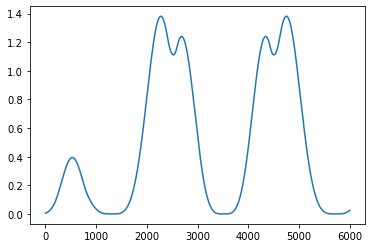

In [63]:
plt.plot((sh.sigmoid(song, 10) * sh.sigmoid(song, 12, 0.25*2*np.pi))[2000:8000])

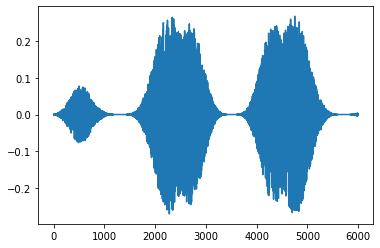

In [59]:
plt.plot(drums[2000:8000])

In [97]:
melody_a = sh.arp(song, [440, 880, 440, 220])
melody_b = sh.arp(song, [523.25, 392.00, 659.25]*6)
string = sh.saw(song, melody_a) * 0.25 + sh.saw(song, melody_b) * 0.25
play(string*0.5)

In [98]:
full_song = (bass_line_wave * sh.smoothstep(2, 3, song) + 
    drums * 0.25 + 
    string * 0.5 * (sh.smoothstep(4, 6, song) - sh.smoothstep(8, 10, song)))
play(sh.scale_normalize(full_song) * overall_env)

# Final Thoughts
* Even our "complex" song, is a relatively short amount of code
* Each piece of this code is simple, in and of itself
* Complex behavior emerges from simple systems

# We Don't Need to Know What We're Doing
* I didn't know this would work
* I didn't need to make it good, just good enough
* I had a lot of fun building it

<img width="320" src="images/bobross.jpg">
<blockquote style="font-size: largest"><strike>Painting</strike> Programming should make you happy.</blockquote>

# Thanks

* Source: https://github.com/RemyPorter/ShadowMusic
* Check out my Soundcloud: https://soundcloud.com/remy-porter
* Twitter: @remyporter

I'd love to see your projects!